# 4.1 정규방정식

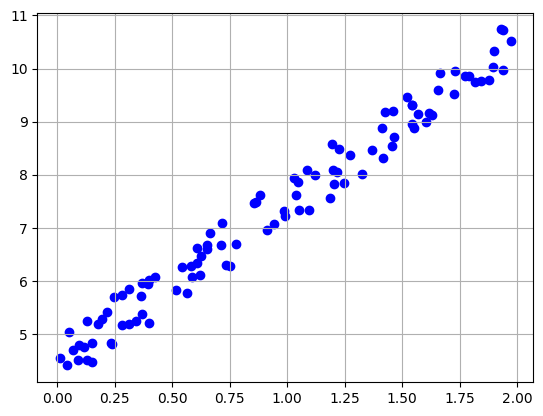

In [1]:
import numpy as np #numpy library를 np로 호출합니다.

np.random.seed(42) #난수 시드를 지정합니다.
m = 100 #m=100 변수를 선언합니다. m은 점의 개수입니다.
X = 2*np.random.rand(m,1) # 변수 X에 0~2 사이의 랜덤한 값을 가지는 100x1 shape의 numpy array를 선언합니다.
y = 4 + 3 * X + np.random.rand(m,1) #변수 y에 3*X+4에 0~1사이의 랜덤한 값을 추가해서 100x1 shape의 numpy array를 선언합니다.

#plot 해보기
import matplotlib.pyplot as plt #matplotlib 라이브러리의 모듈 pyplot을 plt로 호출합니다.
plt.scatter(X, y, color='blue', label='Data points') #X, y array를 각각 x좌표 y좌표로 plot합니다.
plt.grid() #격자를 추가합니다.
plt.show() #그래프를 plot합니다.

In [2]:
from sklearn.preprocessing import add_dummy_feature #sklearn 라이브러리 Preprocessing 모듈에서 add_dummpy_feature 함수를 호출합니다.
X_b = add_dummy_feature(X) #X_b라는 변수에 첫번째 열에 value=1. (default)을 추가해서 array를 반환합니다. X_b의 shape는 100x2입니다.
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y #X_b의 전치행렬과 X_b간의 행렬곱셈을 수행하고, np.linalg.inv를 통해 역행렬을 계산합니다. 이후 X_b의 전치행렬과 y와 행렬곱셈을 수행합니다.

In [3]:
theta_best #정규방정식 (normal eqaution)을 통해 계산한 일차방정식의 계수입니다. 각각 (X^0, X^1)

array([[4.51359766],
       [2.98323418]])

In [4]:
X_new = np.array([[0], [2]]) #[[0],[2]]인 2차원 배열 X_new 선언합니다.
X_new_b = add_dummy_feature(X_new) #X_new의 첫번째 열에 value=1. (default)을 추가해서 array를 X_new_b로 반환니다.
y_predict = X_new_b @ theta_best #정규방정식을 계수를 X_new_b와 행렬곱 연산을 수행합니다.
y_predict #일차식을 계산하면 x=0일때 -> 4.51359766 x=2일때 -> 10.48006601가 나옴.

array([[ 4.51359766],
       [10.48006601]])

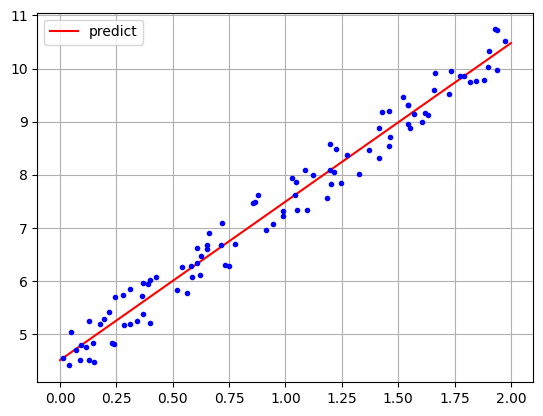

In [5]:
plt.plot(X_new, y_predict, "-r", label="predict") #x=0과 x=2일때의 일찻힉 결과를 선형으로 interpolate해서 plot합니다.
plt.plot(X,y,"b.") #X, y array를 각각 x좌표 y좌표로 plot합니다.
plt.legend() #label에대한 범례를 추가합니다.
plt.grid() #격자를 추가합니다.
plt.show() #그래프를 plot합니다.

In [6]:
from sklearn.linear_model import LinearRegression #sklearn 라이브러리 linear_model모듈에서 LinearRegression를 호출합니다.
lin_reg = LinearRegression() #LinearRegression함수(class)를 사용하기 위해 lin_reg로 instance를 선언합니다.
lin_reg.fit(X,y) #배열 X,y를 LinearRegression의 instance의 fit함수를 통해 연산을 진행합니다.
lin_reg.intercept_, lin_reg.coef_ #각각 일차방정식의 계수입니다. 각각 (X^0, X^1)

(array([4.51359766]), array([[2.98323418]]))

In [7]:
lin_reg.predict(X_new) #instance에서 predict 함수를 통해 배열 X_new에 대한 각각의 예측 결과입니다.

array([[ 4.51359766],
       [10.48006601]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6) #numpy 라이브러리의 linalg.lstsq 함수를 사용하여 linear regression 해 구하기.
theta_best_svd #최적의 일차방정식의 계수 해입니다.

array([[4.51359766],
       [2.98323418]])

In [9]:
np.linalg.pinv(X_b)@y #유사역행렬을 사용해 구한 일차방정식 계수 해 입니다.

array([[4.51359766],
       [2.98323418]])

# 4.2 경사하강법

In [10]:
eta = 0.1 #학습률, gradient에 곱해지는 값
n_epochs = 1000 #에포크, 총 학습을 loop
m = len(X_b) #총 샘플의 개수

np.random.seed(42) #난수 시드를 지정합니다.
theta = np.random.randn(2,1) #theta를 무작위 값으로 지정합니다. 일차식의 처음 일차식의 계수입니다.
for epoch in range(n_epochs): #학습을 n_epochs만큼 반복합니다.
    gradients = 2 / m * X_b.T@(X_b@theta - y) #현재 계수(theta)를 사용하여 예측값을 계산하고 실제 값과의 차이를 구합니다.
                                              #이 차이에 대한 평균제곱오차의 편미분 값을 gradients에 선언합니다.
    theta = theta - eta * gradients #gradients에 학습률을 곱한 값을 theta에서 빼서 theta를 다시 조정합니다.

In [11]:
theta #경사하강법을 사용하여 구한 일차방정식의 계수입니다.

array([[4.51359766],
       [2.98323418]])

In [12]:
n_epochs = 50 #에포크, 총 학습을 loop
t0,t1 = 5,50 #학습 스케줄러 하이퍼파라미터

def learning_schedule(t): #learning_schedule 함수 선언. gradient에 곱해지는 학습률을 iteration마다 낮춤.
    return t0 / (t+t1) #학습률을 하이퍼 파라미터를 통해 조정합니다.

np.random.seed(42) #난수 시드를 지정합니다.
theta = np.random.randn(2,1) #theta를 무작위 값으로 지정합니다. 일차식의 처음 일차식의 계수입니다.

for epoch in range(n_epochs): #학습을 n_epochs만큼 반복합니다.
    for iteration in range(m): #샘플의 수 많큼 iteration을 반복합니다.
        random_index = np.random.randint(m) #numpy의 random.randint를 사용해 숫자 100까지중 임의의 정수를 뽑습니다.
        xi = X_b[random_index:random_index+1] #X_b에서 임의의 정수로 뽑은 random_index로 indexing하여 array를 구합니다. dummy value 1.이 첫번째 열에 붙은 형태입니다.
        yi = y[random_index:random_index+1]  #y에서 임의의 정수로 뽑은 random_index로 indexing하여 array를 구합니다. dummy value 1.이 첫번째 열에 붙은 형태입니다.
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #numpy의 dot 함수를 통해 내적을 구해 gradient를 구합니다. 2차원 공간에서는 행렬곱 @와 같은 역할을 합니다.
        eta = learning_schedule(epoch * m + iteration) #학습률을 epochdhk iteration을 가지고 재조정합니다.
        theta = theta - eta * gradients #gradients에 학습률을 곱한 값을 theta에서 빼서 theta를 다시 조정합니다.

In [13]:
theta #확률적 경사하강법을 사용하여 구한 일차방정식의 계수입니다.

array([[4.51548062],
       [2.9775157 ]])

In [14]:
from sklearn.linear_model import SGDRegressor #사이킷런 library linear_model모듈에서 SGDRegressor을 호출합니다.

sgd_reg = SGDRegressor(   #SGDRegressor instance를 선언합니다.
    max_iter=1000,        #훈련 데이터에 대한 최대 epoch.
    tol=1e-5,             #stop criterion. loss > best_loss - tol이면 early stop 합니다.
    penalty=None,         #사용할 페널티 (regularization).
    eta0=0.01,            #초기 학습률.
    n_iter_no_change=100, #모델의 improvement가 없을때 early stop할 iteration.
    random_state=42)      #데이터 shuffle에 대한 난수 지정.

sgd_reg.fit(X,y.ravel())  #linear모델을  Stochastic Gradient Descent(확률적 경사하강법)에 적용합니다. ravel()함수는 감싸고있는 차원을 하나 제거합니다.

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_  #사이킷런의 SGDRegressor을 사용하여 구한 일차방정식의 계수입니다.

(array([4.50316965]), array([2.99156535]))

# 4.3 다항 회귀

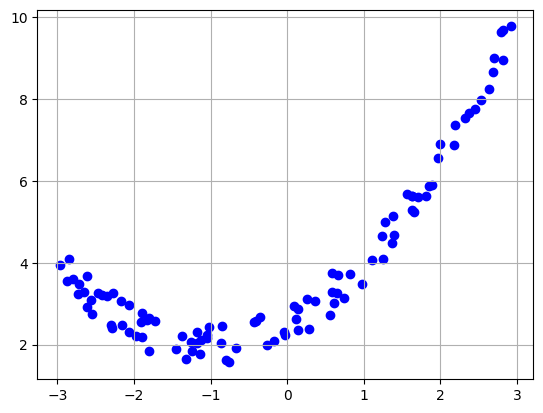

In [16]:
np.random.seed(42) #난수 시드를 지정합니다.
m = 100 #m=100 변수를 선언합니다. m은 점의 개수입니다.
X = 6*np.random.rand(m,1) - 3  # 변수 X에 -3~3 사이의 랜덤한 값을 가지는 100x1 shape의 numpy array를 선언합니다.
y = 0.5*X**2 + X + 2 + np.random.rand(m,1) #변수 X에 이차식을 적용하고 랜덤한 0~1사이의 변수를 더해서 array를 선언합니다.

#plot 해보기
plt.scatter(X, y, color='blue', label='Data points') #X, y array를 각각 x좌표 y좌표로 plot합니다.
plt.grid() #격자를 추가합니다.
plt.show() #그래프를 plot합니다.

In [17]:
from sklearn.preprocessing import PolynomialFeatures #사이킷런 library linear_model모듈에서 PolynomialFeatures 호출합니다.
poly_features = PolynomialFeatures( #다항식 조합으로 array를 구성하는 PolynomialFeatures의 instance를 선언합니다. 
                    degree=2, # 최대 차수를 지정합니다.
                    include_bias=False) #편향 항을 지정하지 않습니다. (1을 모든 첫번째 열에 추가.)
X_poly = poly_features.fit_transform(X) #array X에 거듭제곱된 열들이 추가된 X_poly를 선언합니다.
X[0] #X의 첫번째 index를 확인합니다.

array([-0.75275929])

In [18]:
X_poly[0] #거듭제곱된 항이 제대로 추가되었는지 X_poly의 첫번째 index를 확인합니다.

array([-0.75275929,  0.56664654])

In [19]:
lin_reg = LinearRegression() #LinearRegression함수(class)를 사용하기 위해 lin_reg로 instance를 선언합니다.
lin_reg.fit(X_poly, y) #배열 X_poly,y를 LinearRegression의 instance의 fit함수를 통해 연산을 진행합니다.
lin_reg.intercept_, lin_reg.coef_ # 선형회귀 결과입니다.  각각 (X^0, X^1, X^2)의 계수.

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

# 4.4 학습 곡선

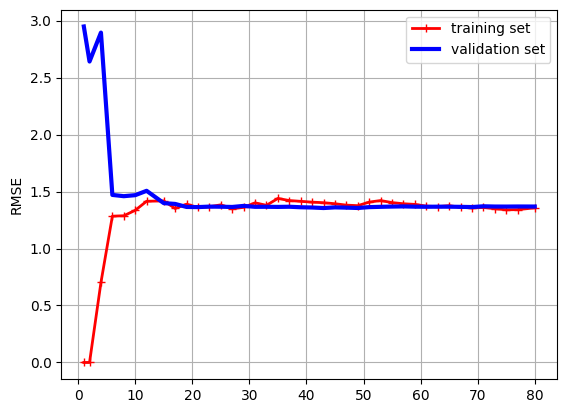

In [20]:
from sklearn.model_selection import learning_curve #사이킷런 library model_selection모듈에서 learning_curve 호출합니다.

train_sizes, train_scores, valid_scores = learning_curve( #학습곡선을 생성하는데 사용한 훈련 예제의 수(train_sizes), 훈련세트의 점수(train_scores), 검증세트의 점수(valid_scores)
                                            LinearRegression(), #fit을 적용하는 estimator
                                            X, #training vector
                                            y, #target vector
                                            train_sizes = np.linspace(0.01,1.0,40), #학습에 사용될 훈련세트입니다. 0.1~1.0까지 40등분한 array를 사용합니다.
                                            cv=5, #K-cross validation의 k를 지정합니다.
                                            scoring="neg_root_mean_squared_error") #Root mean squared error를 regression loss로 사용합니다.
train_errors = -train_scores.mean(axis=1) #train_scores를 각각 첫번째 axis에 대해 평균을 내고 음수로 변환.
valid_errors = -valid_scores.mean(axis=1) #valid_scores 각각 첫번째 axis에 대해 평균을 내고 음수로 변환.

#그래프 plot. (과소적합.)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="training set") #Train loss plot. 훈련 데이터가 비선형이기에 환벽히 학습하는것은 불가능.
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation set") #Valid loss plot. 처음 적은 수의 훈련샘플로 훈련될때 검증오차가 초기에 매우 큼.
plt.legend() #label의 범례를 추가합니다.
plt.ylabel('RMSE') #y축 label을 작성합니다.
plt.grid() #격자를 추가합니다.
plt.show() #그래프를 plot합니다.

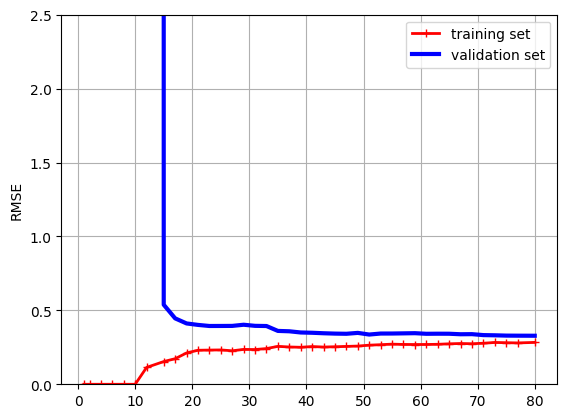

In [21]:
from sklearn.pipeline import make_pipeline #사이킷런 library pipeline모듈에서 make_pipeline 호출합니다.

polynomial_regression = make_pipeline( #두 모델을 연결하여 하나의 모델로 만듬.
                            PolynomialFeatures(degree=10, include_bias=False), #주어진 벡터를 10차 다항 array로 변환. 편향항은 추가되지 않음.
                            LinearRegression()) #다항식 특성을 기반으로한 선형회귀 모델 생성.

train_sizes, train_scores, valid_scores = learning_curve( #학습곡선을 생성하는데 사용한 훈련 예제의 수(train_sizes), 훈련세트의 점수(train_scores), 검증세트의 점수(valid_scores)
                                                polynomial_regression, #fit을 적용하는 estimator
                                                X, #training vector
                                                y, #target vector
                                                train_sizes=np.linspace(0.01,1.0,40), #학습에 사용될 훈련세트입니다. 0.1~1.0까지 40등분한 array를 사용합니다.
                                                cv=5, #K-cross validation의 k를 지정합니다.
                                                scoring="neg_root_mean_squared_error") #Root mean squared error를 regression loss로 사용합니다.

train_errors = -train_scores.mean(axis=1) #train_scores를 각각 첫번째 axis에 대해 평균을 내고 음수로 변환.
valid_errors = -valid_scores.mean(axis=1) #valid_scores 각각 첫번째 axis에 대해 평균을 내고 음수로 변환.

#그래프 plot. (과대적합.)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="training set") #Train loss plot. 훈련 데이터가 오차가 이전보다 훨씬 낮음.
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="validation set") #Valid loss plot. valid loss가 train loss보다 크게 나타남
plt.legend() #label의 범례를 추가합니다.
plt.ylabel('RMSE') #y축 label을 작성합니다.
plt.ylim(0, 2.5) #plot되는 y축 범위를 제한
plt.grid() #격자를 추가합니다.
plt.show() #그래프를 plot합니다.

# 4.5 규제가 있는 선형 모델

In [22]:
from sklearn.linear_model import Ridge #사이킷런 library linear_model모듈에서 Ridge 호출합니다.
ridge_reg = Ridge( #l2 정규화가 적용된 linear least squre를 하는 Ridge의 instance를 선언합니다.
                alpha=0.1, #정규화 강도를 제어하면서 L2 항을 곱하는 상수입니다.
                solver="cholesky") #scipy.linalg.solv를 사용하여 계산합니다.
ridge_reg.fit(X,y) #릿지회귀를 fit 합니다.
ridge_reg.predict([[1.5]]) #릿지회귀의 결과입니다.

array([[5.44714236]])

In [23]:
sgd_reg = SGDRegressor( #확률적 경사하강법 SGDRegressor의 instance를 선언합니다.
            penalty="l2", #사용할 페널티 (regularization) - l2 regularization.
            alpha=0.1/m, #정규화 항에 곱하는 상수입니다. 높을수록 정규화가 더 크게 됩니다.
            tol=None, #stop criterion, None이면 설정하지 않습니다.
            max_iter=1000, #훈련 데이터에 대한 최대 epoch.
            eta0=0.01, #초기 학습률.
            random_state=42) #데이터 shuffle에 대한 난수 지정.
sgd_reg.fit(X,y.ravel()) #X,y에 Stochastic Gradient Descent(확률적 경사하강법)에 적용합니다. ravel()함수는 감싸고있는 차원을 하나 제거합니다.
sgd_reg.predict([[1.5]]) #경사하강법의 결과입니다.

array([5.44590102])